In [1]:
import numpy as np
from scipy import stats
import sys

#My functions
sys.path.append('/home/ags72/Documents/MTWDBN/Tools')
from GraphFunctions import graph_to_matrix_6pop_3timeslice
from StatFunctions import calculate_F_score

In [2]:
truemodel= [('I1_t1','I1_t3'), ('E1_t1','E1_t3'), ('I2_t1','I2_t3'), ('E2_t1','E2_t3'), ('I3_t1','I3_t3'), ('E3_t1','E3_t3'),
            ('I1_t1','E1_t3'), ('E1_t1','I1_t3'), ('I2_t1','E2_t3'), ('E2_t1','I2_t3'), ('I3_t1','E3_t3'), ('E3_t1','I3_t3'),
            ('E2_t1','E1_t3'), ('E1_t1','E3_t3'),
            ('I1_t2','I1_t3'), ('E1_t2','E1_t3'), ('I2_t2','I2_t3'), ('E2_t2','E2_t3'), ('I3_t2','I3_t3'), ('E3_t2','E3_t3'),
            ('I1_t2','E1_t3'), ('E1_t2','I1_t3'), ('I2_t2','E2_t3'), ('E2_t2','I2_t3'), ('I3_t2','E3_t3'), ('E3_t2','I3_t3'),
            ('E2_t2','E1_t3'), ('E1_t2','E3_t3')]
           
true_graph = graph_to_matrix_6pop_3timeslice(truemodel)[0:6,:] #Ignore edges in the last timeslice

In [3]:
# These graphs were imported from /home/ags72/Jadi_Storage/NeuroInformaticPipeLineADas/PaperFigures/Fig2 in PopObs20, PopObs40, PopObs60, PopObs80, PopObs100 respectively. 
# MTwDBN graphs in MWUtestRes.txt
# Binary graphs in DiscDagApproach.txt
# Threshold graphs in WeightsOfEdges.txt


graph_20 = [('V_lyr1_spk2_t3', 'V_lyr3_spk2_t3'), ('V_lyr1_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk1_t3'), ('V_lyr1_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk1_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t3', 'V_lyr1_spk1_t3'), ('V_lyr3_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t3', 'V_lyr1_spk2_t3'), ('V_lyr3_spk2_t3', 'V_lyr1_spk1_t3'), ('V_lyr3_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr1_spk2_t1', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t1', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr1_spk1_t1', 'V_lyr3_spk1_t3'), ('V_lyr2_spk2_t1', 'V_lyr1_spk2_t3'), ('V_lyr2_spk2_t1', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t1', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk2_t3'), ('V_lyr1_spk2_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr3_spk1_t3'), ('V_lyr2_spk2_t2', 'V_lyr1_spk2_t3'), ('V_lyr2_spk2_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk2_t3')]

graph_40 = [('V_lyr1_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t3', 'V_lyr2_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr2_spk1_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk1_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t1', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk1_t2', 'V_lyr3_spk1_t3'), ('V_lyr2_spk2_t2', 'V_lyr2_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk1_t3')]

graph_60 = [('V_lyr1_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr2_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr2_spk1_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t1', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr2_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr2_spk2_t2', 'V_lyr2_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t2', 'V_lyr2_spk2_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk1_t3')]

graph_80 = [('V_lyr1_spk2_t3', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t3', 'V_lyr2_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t1', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr2_spk2_t2', 'V_lyr1_spk2_t3'), ('V_lyr2_spk2_t2', 'V_lyr2_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk1_t3')]

graph_100 = [('V_lyr1_spk2_t3', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t3', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr2_spk1_t3', 'V_lyr2_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t3', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t3', 'V_lyr3_spk1_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t1', 'V_lyr1_spk1_t3'), ('V_lyr2_spk1_t1', 'V_lyr2_spk1_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t1', 'V_lyr3_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr1_spk1_t3'), ('V_lyr1_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk2_t3'), ('V_lyr1_spk1_t2', 'V_lyr1_spk1_t3'), ('V_lyr2_spk2_t2', 'V_lyr1_spk2_t3'), ('V_lyr2_spk2_t2', 'V_lyr2_spk1_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk2_t3'), ('V_lyr2_spk1_t2', 'V_lyr2_spk1_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk2_t2', 'V_lyr3_spk1_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk2_t3'), ('V_lyr3_spk1_t2', 'V_lyr3_spk1_t3')]

In [4]:
new_pop_names = {'V_lyr1_spk2_t1': 'E1_t1',
                 'V_lyr1_spk1_t1': 'I1_t1',
                 'V_lyr2_spk2_t1': 'E2_t1',
                 'V_lyr2_spk1_t1': 'I2_t1',
                 'V_lyr3_spk2_t1': 'E3_t1',
                 'V_lyr3_spk1_t1': 'I3_t1',
                 
                 'V_lyr1_spk2_t2': 'E1_t2',
                 'V_lyr1_spk1_t2': 'I1_t2',
                 'V_lyr2_spk2_t2': 'E2_t2',
                 'V_lyr2_spk1_t2': 'I2_t2',
                 'V_lyr3_spk2_t2': 'E3_t2',
                 'V_lyr3_spk1_t2': 'I3_t2',
                 
                 'V_lyr1_spk2_t3': 'E1_t3',
                 'V_lyr1_spk1_t3': 'I1_t3',
                 'V_lyr2_spk2_t3': 'E2_t3',
                 'V_lyr2_spk1_t3': 'I2_t3',
                 'V_lyr3_spk2_t3': 'E3_t3',
                 'V_lyr3_spk1_t3': 'I3_t3'}

In [5]:
graph_20 = graph_to_matrix_6pop_3timeslice([tuple([new_pop_names[pop] for pop in edge]) for edge in graph_20])
graph_40 = graph_to_matrix_6pop_3timeslice([tuple([new_pop_names[pop] for pop in edge]) for edge in graph_40])
graph_60 = graph_to_matrix_6pop_3timeslice([tuple([new_pop_names[pop] for pop in edge]) for edge in graph_60])
graph_80 = graph_to_matrix_6pop_3timeslice([tuple([new_pop_names[pop] for pop in edge]) for edge in graph_80])
graph_100 = graph_to_matrix_6pop_3timeslice([tuple([new_pop_names[pop] for pop in edge]) for edge in graph_100])

In [6]:
F_scores = []
recalls = []
precisions = []

for graph in [graph_20, graph_40, graph_60, graph_80, graph_100]:
    DBN_graph = np.logical_or(np.copy(graph[0:6,:]), np.copy(graph[6:12,:]))
    
    F_score, recall, precision = calculate_F_score(true_graph, DBN_graph, False)
    
    
    F_scores.append(F_score)
    recalls.append(recall)
    precisions.append(precision)
                    
F_scores

[0.7407407407407408,
 0.7692307692307692,
 0.8148148148148148,
 0.923076923076923,
 0.923076923076923]

Text(0.5, 1.0, 'Anirban Graphs, Sensitivity to Neuron Drop')

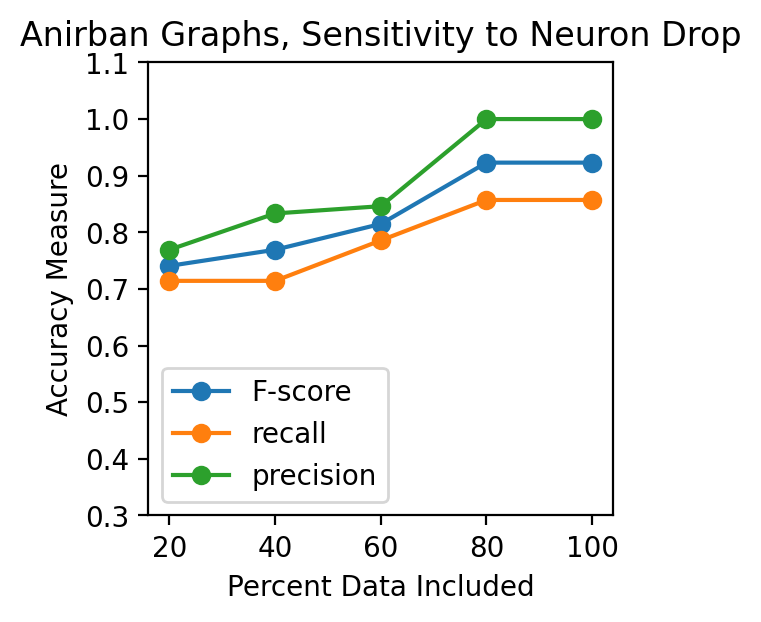

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (3,3), dpi = 200)

ax.plot([20,40,60,80,100],F_scores, 'o-', label = 'F-score')
ax.plot([20,40,60,80,100],recalls, 'o-', label = 'recall')
ax.plot([20,40,60,80,100],precisions, 'o-', label = 'precision')
ax.set_ylim([0.3,1.1])
ax.set_xlabel('Percent Data Included')
ax.set_ylabel('Accuracy Measure')
ax.legend()
ax.set_title('Anirban Graphs, Sensitivity to Neuron Drop')